<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.decomposition import FastICA

In [37]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.0.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, scipy, threadpoolctl, joblib
Required-by: yellowbrick, sklearn-pandas, qudida, mlxtend, lightgbm, librosa, imbalanced-learn, fastai


In [2]:
# load dataset from github account
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/diabetes_dataset.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#feature variables
x=df.drop(['Outcome'], axis=1)
#target variable
y=df.Outcome



In [4]:
# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
xs = pd.DataFrame(scaled_x, columns = x.columns)

In [57]:
#2 ICA components
comp = 2
ica = FastICA(n_components=comp, whiten=True)
ICx = ica.fit_transform(xs)
IC_Df = pd.DataFrame(data = ICx, columns = ['ic1', 'ic2'])
final2Df = pd.concat([IC_Df, df[['Outcome']]], axis = 1)
print(final2Df.head(10))

# make dataframes
x2ICA = final2Df.drop(['Outcome'], axis=1)
y2ICA = final2Df['Outcome'] 

#3 ICA components
comp = 3
ica = FastICA(n_components=comp, whiten=True)
ICx = ica.fit_transform(xs)
IC_Df = pd.DataFrame(data = ICx, columns = ['ic1', 'ic2', 'ic3'])
final3Df = pd.concat([IC_Df, df[['Outcome']]], axis = 1)
print(final3Df.head(10))

# make dataframes
x3ICA = final3Df.drop(['Outcome'], axis=1)
y3ICA = final3Df['Outcome'] 

        ic1       ic2  Outcome
0 -0.018219  0.039049        1
1  0.022643 -0.025972        0
2  0.019604  0.040360        1
3  0.019140 -0.040288        0
4 -0.070939 -0.044928        1
5  0.040081  0.014150        0
6  0.015655 -0.034873        1
7  0.057543  0.010634        0
8 -0.081579  0.012282        1
9  0.064717  0.075167        1
        ic1       ic2       ic3  Outcome
0  0.039110 -0.013492 -0.012521        1
1 -0.028785 -0.000646  0.031639        0
2  0.047747  0.055166 -0.024708        1
3 -0.042794 -0.000448  0.026741        0
4 -0.032021  0.032442 -0.126793        1
5  0.013232  0.020284  0.035799        0
6 -0.036880 -0.000028  0.021566        1
7  0.016184  0.070622  0.012866        0
8  0.020000 -0.008272 -0.103749        1
9  0.077693  0.054244  0.037574        1


tp:  0.18880208333333334
fp:  0.171875
fn:  0.16015625
tn:  0.4791666666666667
err:  0.33203125
time:  0.04738483399978577
0.33203125
0.33203125
-0.01171875
0.5761023527971723


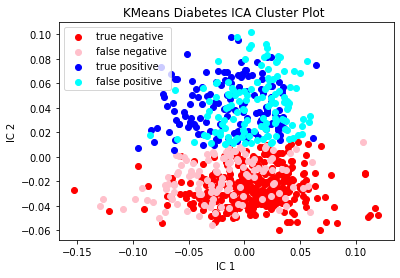

In [99]:
# 2 component KMeans

kmeans = KMeans(n_clusters=2, random_state=1) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x2ICA)
toc = time.perf_counter()
labels = abs(labels - 1) #map cluster number to labels 

tn, fp, fn, tp = confusion_matrix(y2ICA, labels).ravel()/y2ICA.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y2ICA, labels))
print(mean_absolute_error(y2ICA, labels))
print(np.mean(y2ICA-labels))
print(np.std(y2ICA-labels))

#
clx=final2Df
clx['Cluster']=labels

cl0 = clx.loc[clx['Cluster'] == 0]
cl0tn = cl0.loc[cl0['Outcome'] == 0]   # true negatives
cl0fn = cl0.loc[cl0['Outcome'] == 1]   # false negatives


cl1 = clx.loc[clx['Cluster'] == 1]
cl1tp = cl1.loc[cl1['Outcome'] == 1]   # true postives
cl1fp = cl1.loc[cl1['Outcome'] == 0]   # false postives

pyplot.scatter(cl0tn['ic1'], cl0tn['ic2'], color='red', label='true negative')
pyplot.scatter(cl0fn['ic1'], cl0fn['ic2'], color='pink', label='false negative')

pyplot.scatter(cl1tp['ic1'], cl1tp['ic2'], color='blue', label='true positive')
pyplot.scatter(cl1fp['ic1'], cl1fp['ic2'], color='cyan', label='false positive')

pyplot.title('KMeans Diabetes ICA Cluster Plot ')
pyplot.ylabel('IC 2')
pyplot.xlabel('IC 1')
pyplot.legend()

tp:  0.19140625
fp:  0.17838541666666666
fn:  0.15755208333333334
tn:  0.47265625
err:  0.3359375
time:  0.040715101999012404
0.3359375
0.3359375
-0.020833333333333332
0.5792266156024101



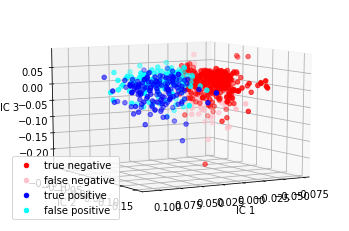

In [101]:
# 3 component KMeans

kmeans = KMeans(n_clusters=2, random_state=1) 
tic = time.perf_counter()
labels = kmeans.fit_predict(x3ICA)
toc = time.perf_counter()
labels = abs(labels - 1) #map cluster number to labels 

tn, fp, fn, tp = confusion_matrix(y3ICA, labels).ravel()/y3ICA.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y3ICA, labels))
print(mean_absolute_error(y3ICA, labels))
print(np.mean(y3ICA-labels))
print(np.std(y3ICA-labels))

clx=final3Df
clx['Cluster']=labels

cl0 = clx.loc[clx['Cluster'] == 0]
cl0tn = cl0.loc[cl0['Outcome'] == 0]   # true negatives
cl0fn = cl0.loc[cl0['Outcome'] == 1]   # false negatives


cl1 = clx.loc[clx['Cluster'] == 1]
cl1tp = cl1.loc[cl1['Outcome'] == 1]   # true postives
cl1fp = cl1.loc[cl1['Outcome'] == 0]   # false postives

fig = pyplot.figure()
ax = pyplot.axes(projection='3d')
ax.view_init(10, 60)

ax.scatter3D(cl0tn['ic1'], cl0tn['ic2'], cl0tn['ic3'], color='red', label='true negative')
ax.scatter3D(cl0fn['ic1'], cl0fn['ic2'], cl0fn['ic3'], color='pink', label='false negative')
ax.scatter3D(cl1tp['ic1'], cl1tp['ic2'], cl1tp['ic3'], color='blue', label='true positive')
ax.scatter3D(cl1fp['ic1'], cl1fp['ic2'], cl1fp['ic3'], color='cyan', label='false positive')

#pyplot.title('Diabetes ICA Cluster Plot ')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
ax.set_zlabel('IC 3')
pyplot.legend(loc='best')
print()

Accuracy using GMM =  0.6484375
tp:  0.22395833333333334
fp:  0.2265625
fn:  0.125
tn:  0.4244791666666667
err:  0.3515625
time:  0.0401917079998384
0.3515625
0.3515625
-0.1015625
0.5841639826228163


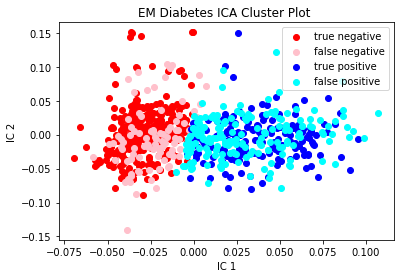

In [98]:
# 2 component EM
gmm = GaussianMixture(n_components=2, max_iter=1000, covariance_type='full', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x2ICA)
toc = time.perf_counter()
labels = abs(gmm_y-1) #correct cluster-label scheme
    
acc = accuracy_score(y2ICA, labels)
print("Accuracy using GMM = ", acc)

tn, fp, fn, tp = confusion_matrix(y2ICA, labels).ravel()/y2ICA.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y2ICA, labels))
print(mean_absolute_error(y2ICA, labels))
print(np.mean(y2ICA-labels))
print(np.std(y2ICA-labels))

clx=final3Df
clx['Cluster']=labels

cl0 = clx.loc[clx['Cluster'] == 0]
cl0tn = cl0.loc[cl0['Outcome'] == 0]   # true negatives
cl0fn = cl0.loc[cl0['Outcome'] == 1]   # false negatives


cl1 = clx.loc[clx['Cluster'] == 1]
cl1tp = cl1.loc[cl1['Outcome'] == 1]   # true postives
cl1fp = cl1.loc[cl1['Outcome'] == 0]   # false postives

pyplot.scatter(cl0tn['ic1'], cl0tn['ic2'], color='red', label='true negative')
pyplot.scatter(cl0fn['ic1'], cl0fn['ic2'], color='pink', label='false negative')

pyplot.scatter(cl1tp['ic1'], cl1tp['ic2'], color='blue', label='true positive')
pyplot.scatter(cl1fp['ic1'], cl1fp['ic2'], color='cyan', label='false positive')

pyplot.title('EM Diabetes ICA Cluster Plot ')
pyplot.ylabel('IC 2')
pyplot.xlabel('IC 1')
pyplot.legend()

In [95]:
# 3 component EM
gmm = GaussianMixture(n_components=2, max_iter=1000, covariance_type='full', random_state=7)
tic = time.perf_counter()
gmm_y = gmm.fit_predict(x3ICA)
toc = time.perf_counter()
labels = abs(gmm_y-1) #correct cluster-label scheme
    
acc = accuracy_score(y3ICA, labels)
print("Accuracy using GMM = ", acc)

tn, fp, fn, tp = confusion_matrix(y3ICA, labels).ravel()/y3ICA.size
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("tn: ", tn)
err = (fp + fn)
print('err: ', err)
print('time: ', (toc-tic))
print(mean_squared_error(y3ICA, labels))
print(mean_absolute_error(y3ICA, labels))
print(np.mean(y3ICA-labels))
print(np.std(y3ICA-labels))

Accuracy using GMM =  0.6770833333333334
tp:  0.26171875
fp:  0.23567708333333334
fn:  0.08723958333333333
tn:  0.4153645833333333
err:  0.3229166666666667
time:  0.038942567999583844
0.3229166666666667
0.3229166666666667
-0.1484375
0.5485280077265122
